## Solution of a Driven Damped Pendulum using SciPy

***Author: Brandon Ismalej (brandon.ismalej.671@my.csun.edu) - (https://github.com/Brandon-Ism)***

In [1]:
!pip install pykan torch numpy matplotlib scikit-learn tqdm sympy setuptools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.2/74.2 kB 2.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import torch
import torch.nn as nn
from torch import autograd
from kan import KAN
import os

In [3]:
from sympy import symbols, Function
gamma_sym = symbols('gamma')
gamma_func = Function('gamma')

# Clear previous definitions
del gamma_sym
del gamma_func

In this notebook, gamma = 1.3

In [4]:
# Initialize Constants
Omega_val = 2 * np.pi 
omega_val = Omega_val * 1.5 
lambda_val = omega_val / 2 
gamma_val = 1.3
omegaSQ_val = omega_val ** 2
f_val = gamma_val * omegaSQ_val

In [5]:
# Define the driven damped pendulum differential equation
def driven_damped_pendulum(t, y, omega, lambda_, gamma, Omega):
    theta, omega_dot = y
    dydt = [omega_dot, -lambda_ * omega_dot - omega**2 * np.sin(theta) + gamma * np.cos(Omega * t)]
    return dydt

# Initial conditions
y0 = [0.0, 0.0]

# Time points
t = np.linspace(0, 20, 15000)

# Solve the differential equation using solve_ivp
sol = solve_ivp(driven_damped_pendulum, [t[0], t[-1]], y0, args=(omega_val, lambda_val, gamma_val, Omega_val), t_eval=t, method='RK45', rtol=1e-13, atol=1e-8)

In [6]:
# Save ODE solver results to CSV
ode_df = pd.DataFrame({'t': sol.t, 'theta': sol.y[0], 'omega_dot': sol.y[1]})
ode_df.to_csv('ode_solver_results.csv', index=False)


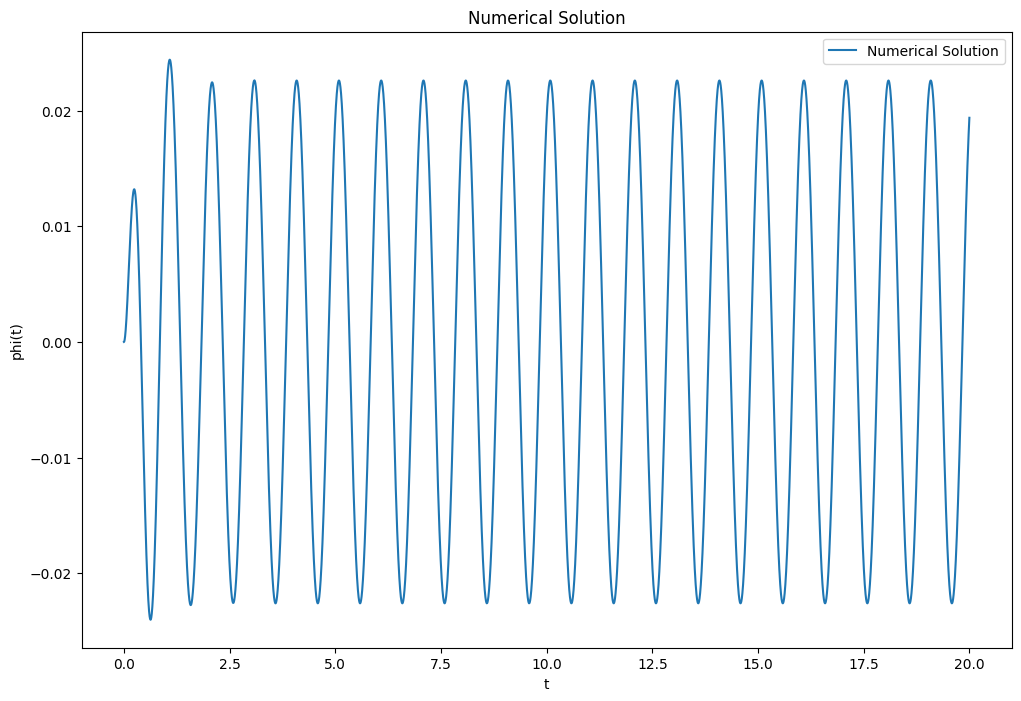

In [7]:
# Plot both the numerical and KAN solutions 
plt.figure(figsize=(12, 8))  
plt.plot(sol.t, sol.y[0], label='Numerical Solution')
plt.xlabel('t')
plt.ylabel('phi(t)')
plt.legend()
plt.title('Numerical Solution')

# limits for zooming in
#plt.xlim(0, 20)  
#plt.ylim(-0.05, 0.05)  

plt.savefig('/kaggle/working/0008.png')
plt.show()